<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/03.E0-Exercicio-Agrupamento-de-Dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Agrupamento de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Agrupamento de dados

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de agrupamento de dados (*clustering*). Você usará a base de dados [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) e avaliará algoritmos de agrupamento para comparar sua efetividade. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à tarefa de agrupamento de dados.

Você deverá utilizar os algoritmos [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means), [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture) e [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) e comparar o resultado produzido por cada modelo para o seguinte conjunto de hiperparâmtros, quando aplicável aquele modelo.

* K-means:
    * Centróides (`n_clusters`): 2, 3, e 6.    
* Gaussian Mixture
    * Componentes (`n_components`): 2, 3, e 6
    * Covariância (`covariance_type`): `'full'`, `'diag'` e `'spherical'`
* DBSCAN:
    * Distância (`eps`): 0.5, 1 e 1.5.
    * Mínimo de amostras (`min_samples`): 5, 10 e 25.


Como parte do objetivo praticar visualizações de dados, para cada experimento, você deve replicar a seguinte visualização usando apenas o [matplotlib](https://matplotlib.org/stable/users/index).

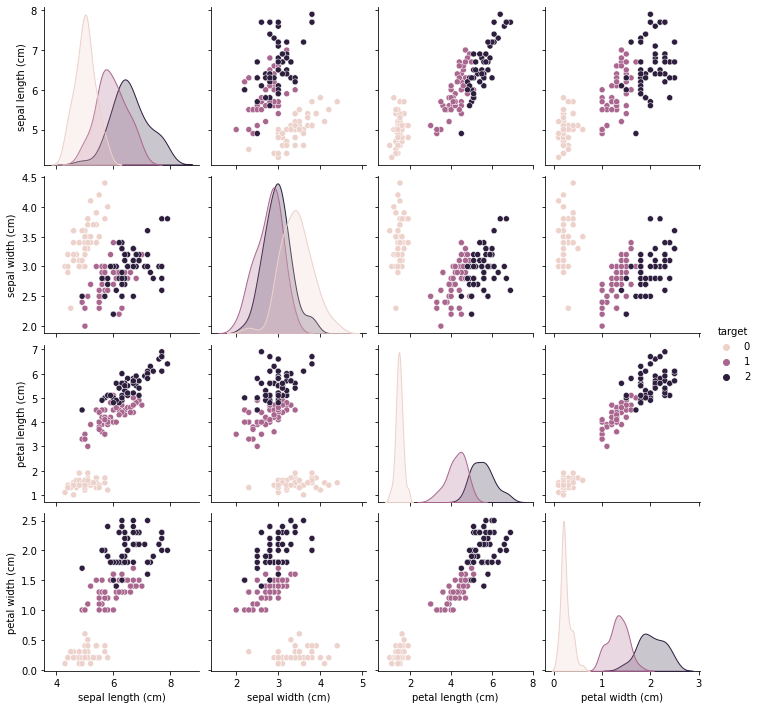

Você deve executar o experimento para cada par *features*, colorindo de acordo com o resultado fornecido pelo modelo de clusterização. Nos elementos da diagonal, você deve executar o cálculo de densidade dos elementos do conjunto usando `KDE` (`bandwidth=1.0, kernel='gaussian'`), também de acordo com a saída do modelo. Compare os experimentos entre si e com o que deveria ser a saída correta dos dados, segundo os rótulos originais do *dataset*.

Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de agrupamento em cenários de aprendizado não-supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução


### Carga do conjunto de dados

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

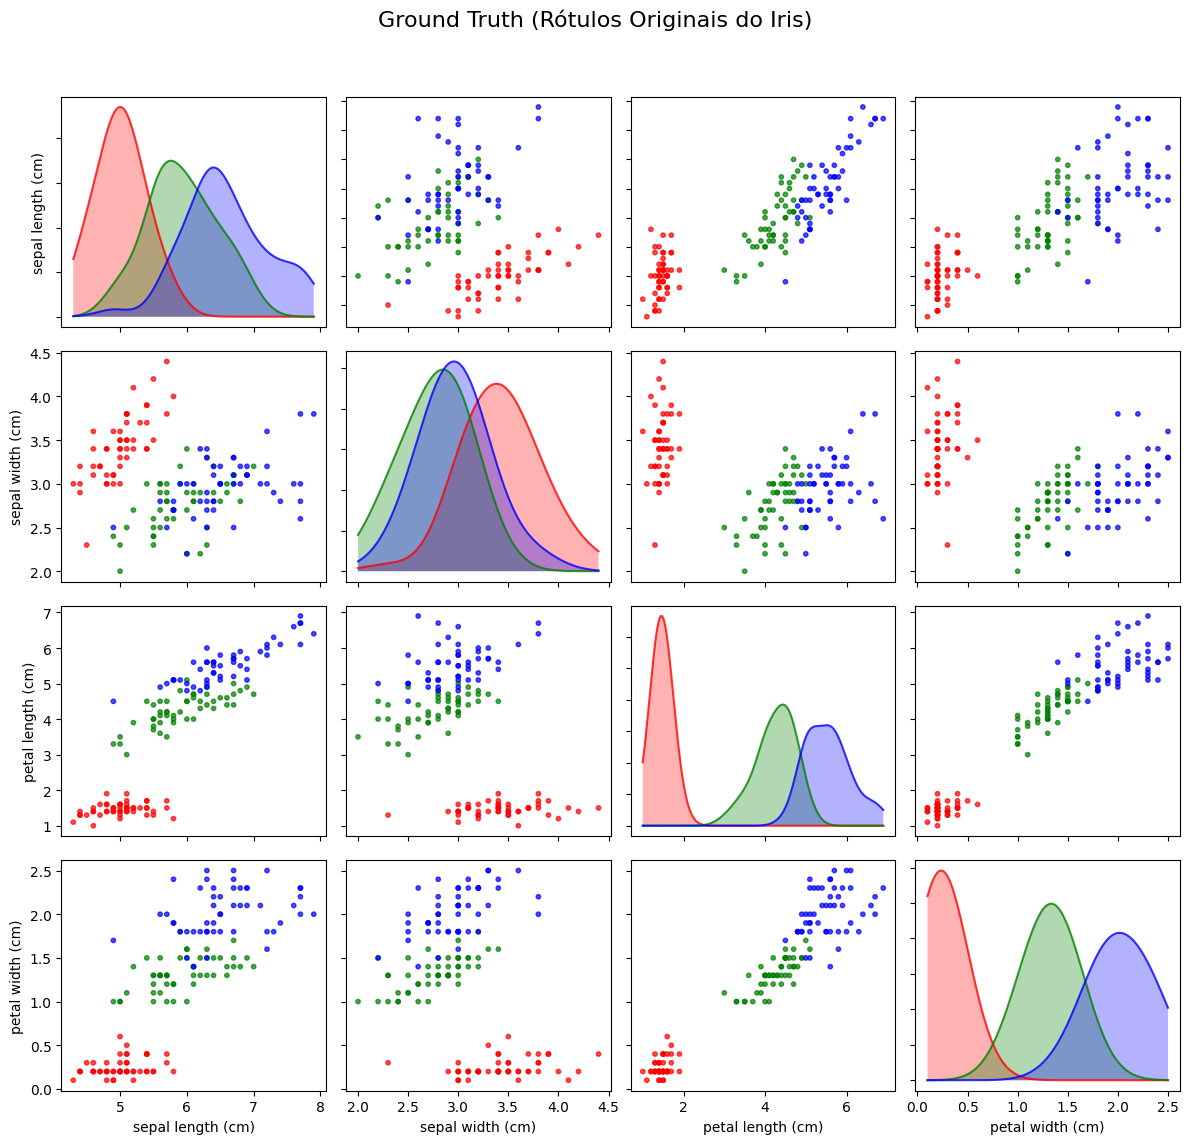

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = iris.data
y_true = iris.target
feature_names = iris.feature_names

def plot_pair_matrix(X, y_pred, title):
    """
    Plota uma matriz de gráficos de dispersão (pair plot) para o conjunto de dados Iris,
    colorido pelos clusters em y_pred.
    A diagonal contém gráficos de densidade (KDE) para cada feature, por cluster.
    Usa apenas matplotlib.
    """

    colors_list = ['r', 'g', 'b', 'c', 'm', 'y']
    labels = np.unique(y_pred)
    n_clusters = len(labels[labels != -1])

    color_map = {label: colors_list[i % len(colors_list)] for i, label in enumerate(labels[labels != -1])}
    color_map[-1] = 'k'

    point_colors = [color_map[l] for l in y_pred]

    fig, ax = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle(title, fontsize=16)

    for i in range(4):
        for j in range(4):

            ax_curr = ax[i, j]

            if i == j:
                x_grid = np.linspace(X[:, i].min(), X[:, i].max(), 200)

                for label, color in color_map.items():
                    if label == -1:
                        continue

                    subset = X[y_pred == label, i]
                    if len(subset) == 0:
                        continue

                    bw = 0.25

                    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
                    kde.fit(subset[:, np.newaxis])
                    log_dens = kde.score_samples(x_grid[:, np.newaxis])

                    ax_curr.plot(x_grid, np.exp(log_dens), color=color, alpha=0.8)
                    ax_curr.fill_between(x_grid, np.exp(log_dens), facecolor=color, alpha=0.3)

                ax_curr.set_yticklabels([])
                ax_curr.set_ylabel('')

            else:
                ax_curr.scatter(X[:, j], X[:, i], c=point_colors, s=10, alpha=0.7)

            if i == 3:
                ax_curr.set_xlabel(feature_names[j])
            else:
                ax_curr.set_xticklabels([])

            if j == 0:
                ax_curr.set_ylabel(feature_names[i])
            else:
                ax_curr.set_yticklabels([])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_pair_matrix(X, y_true, "Ground Truth (Rótulos Originais do Iris)")

### K-means

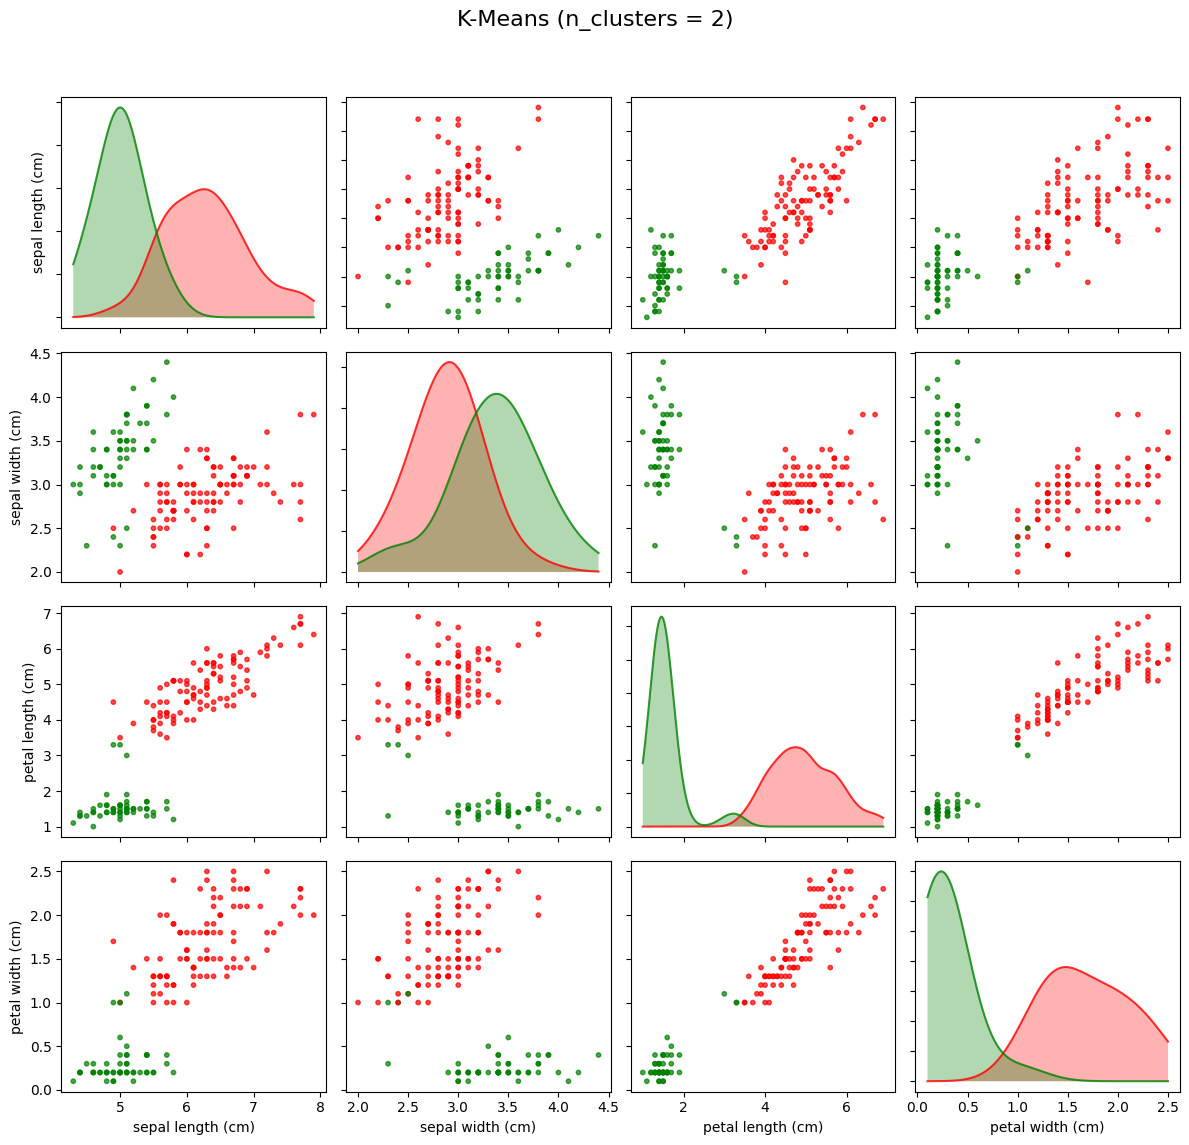

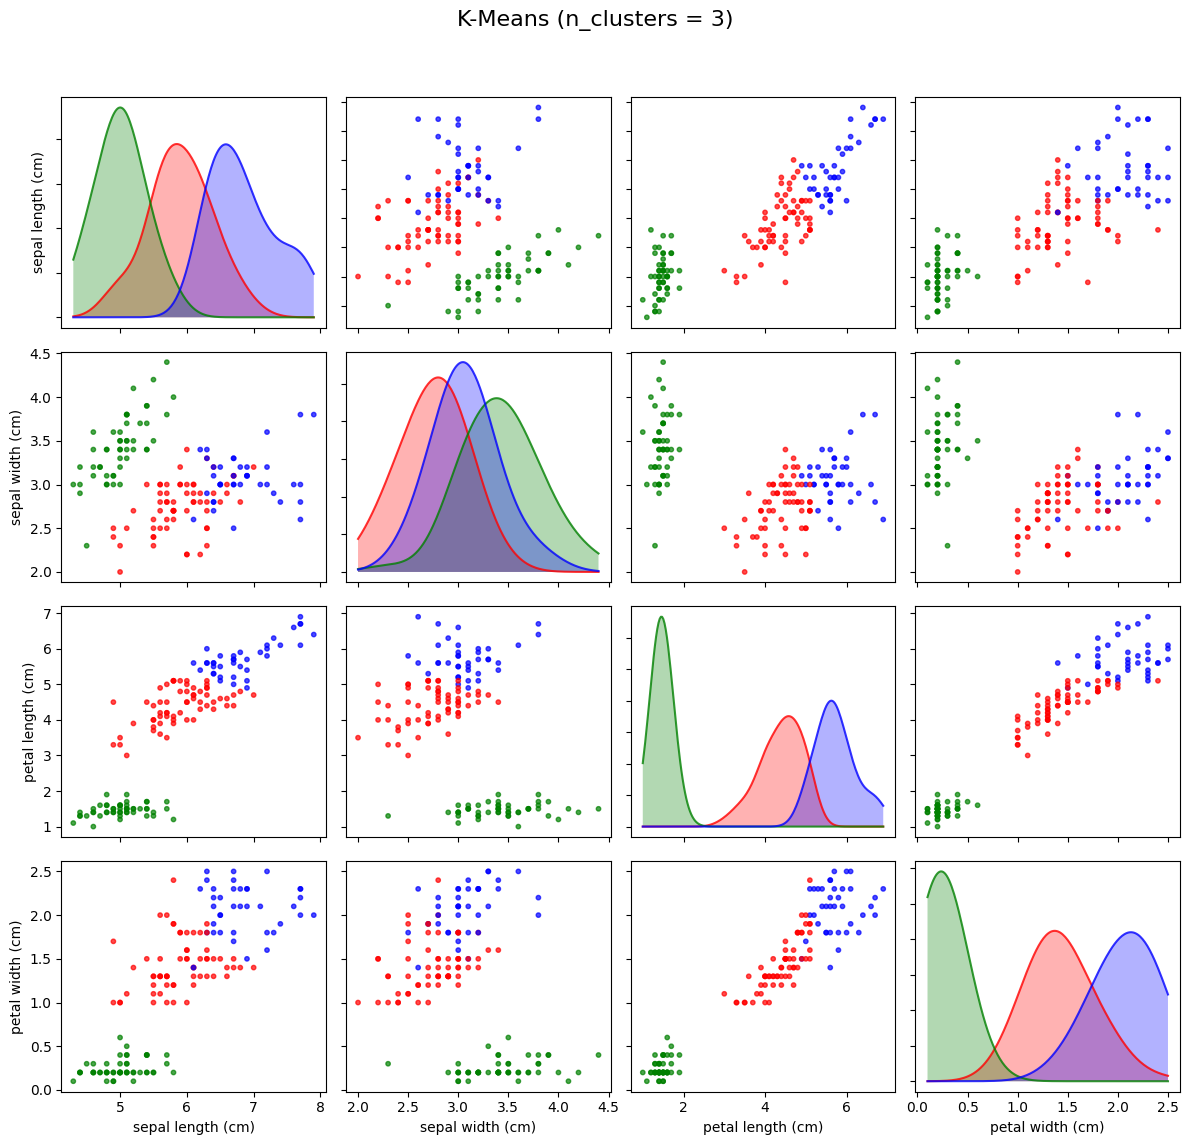

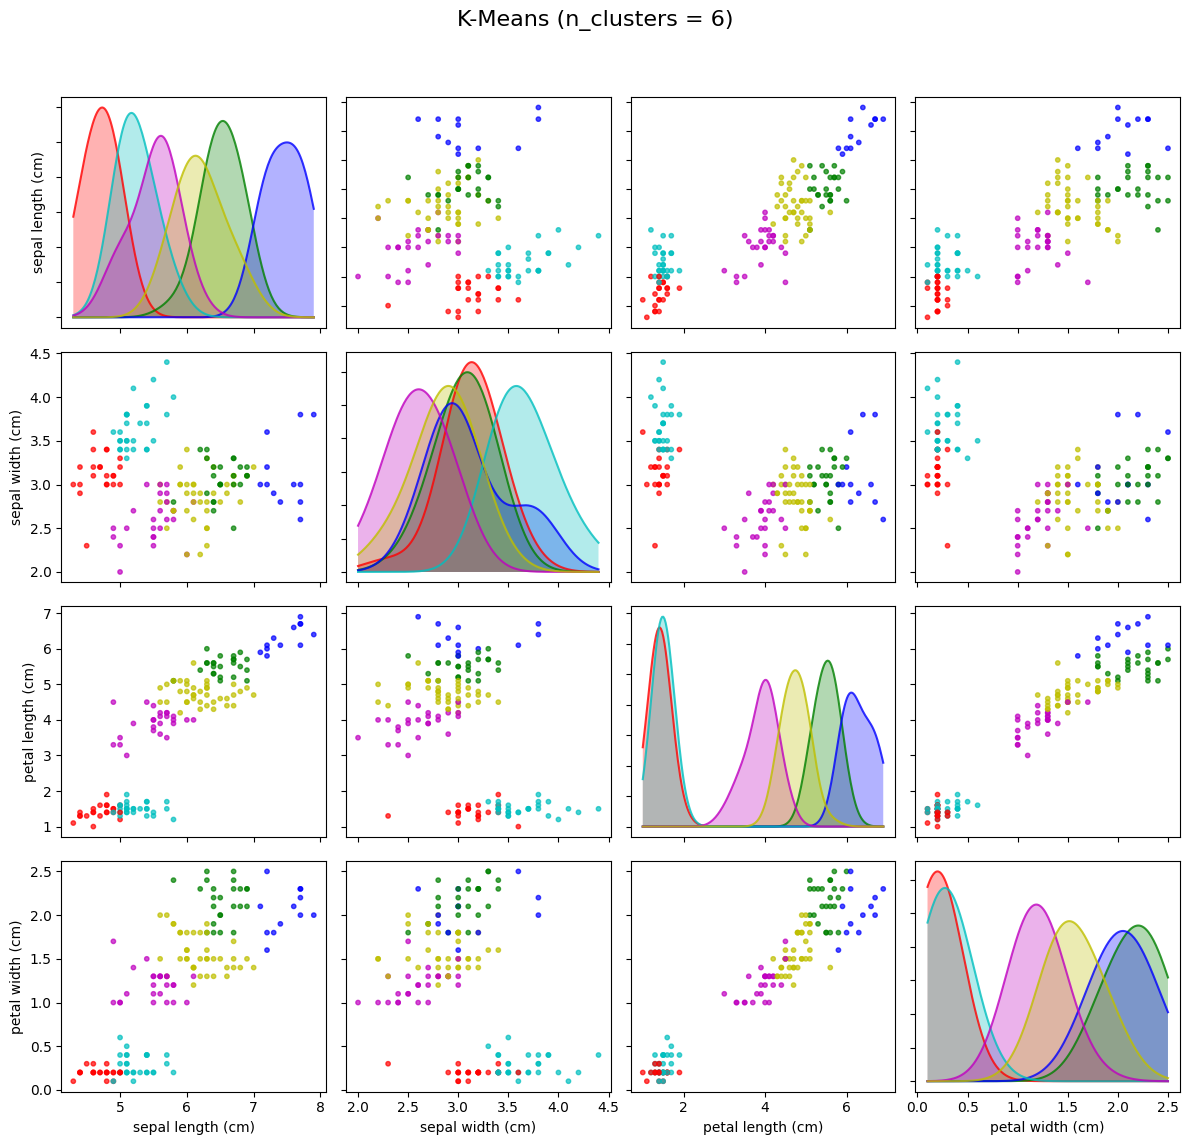

In [4]:
from sklearn.cluster import KMeans

k_values = [2, 3, 6]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(X)

    plot_pair_matrix(X, y_kmeans, f"K-Means (n_clusters = {k})")

### Gaussian

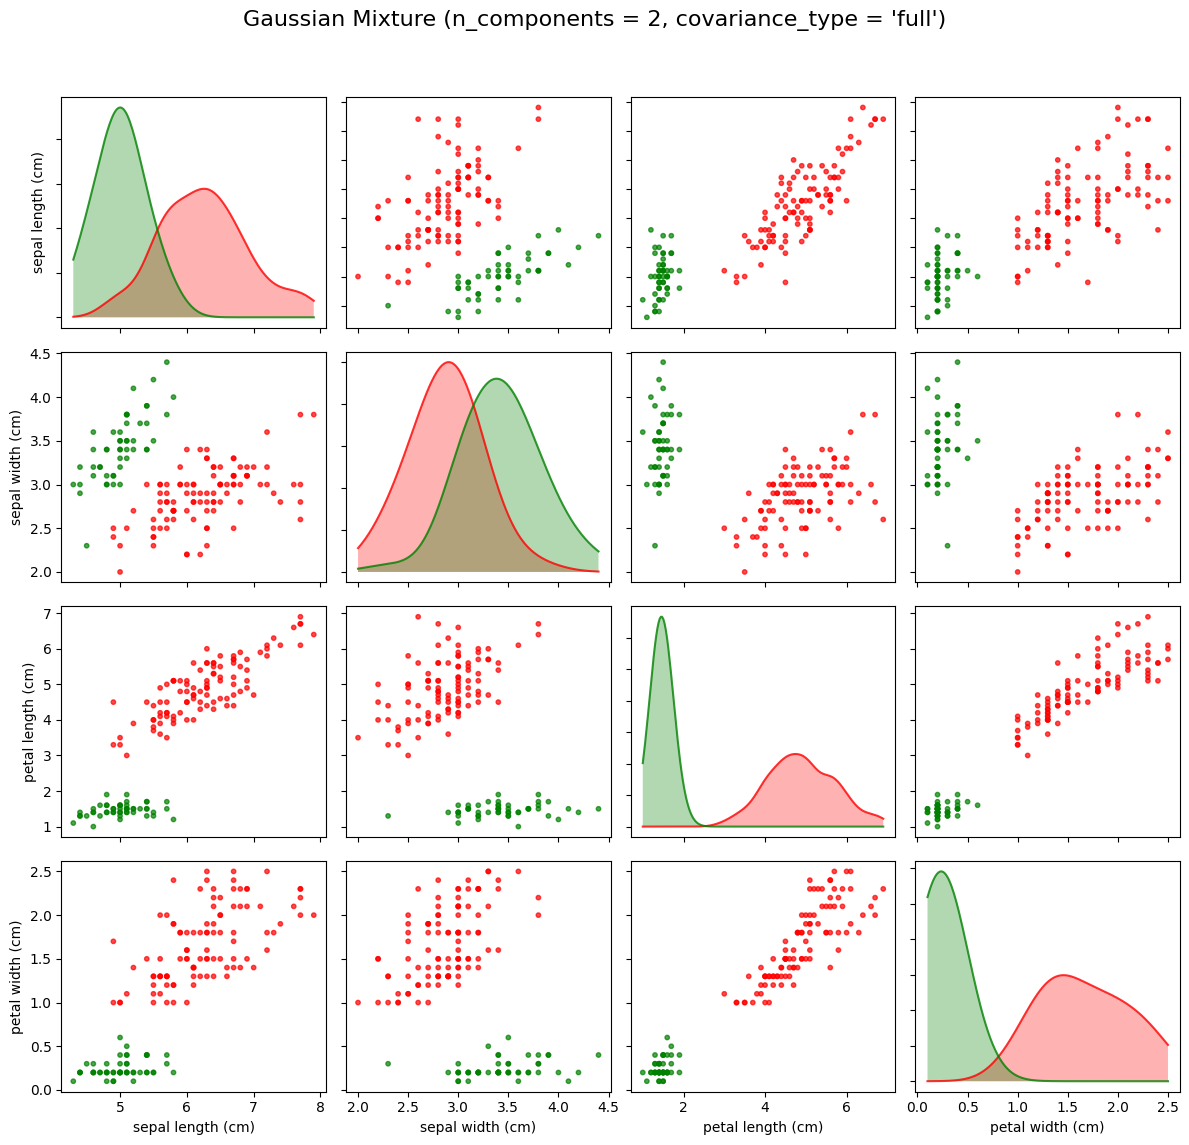

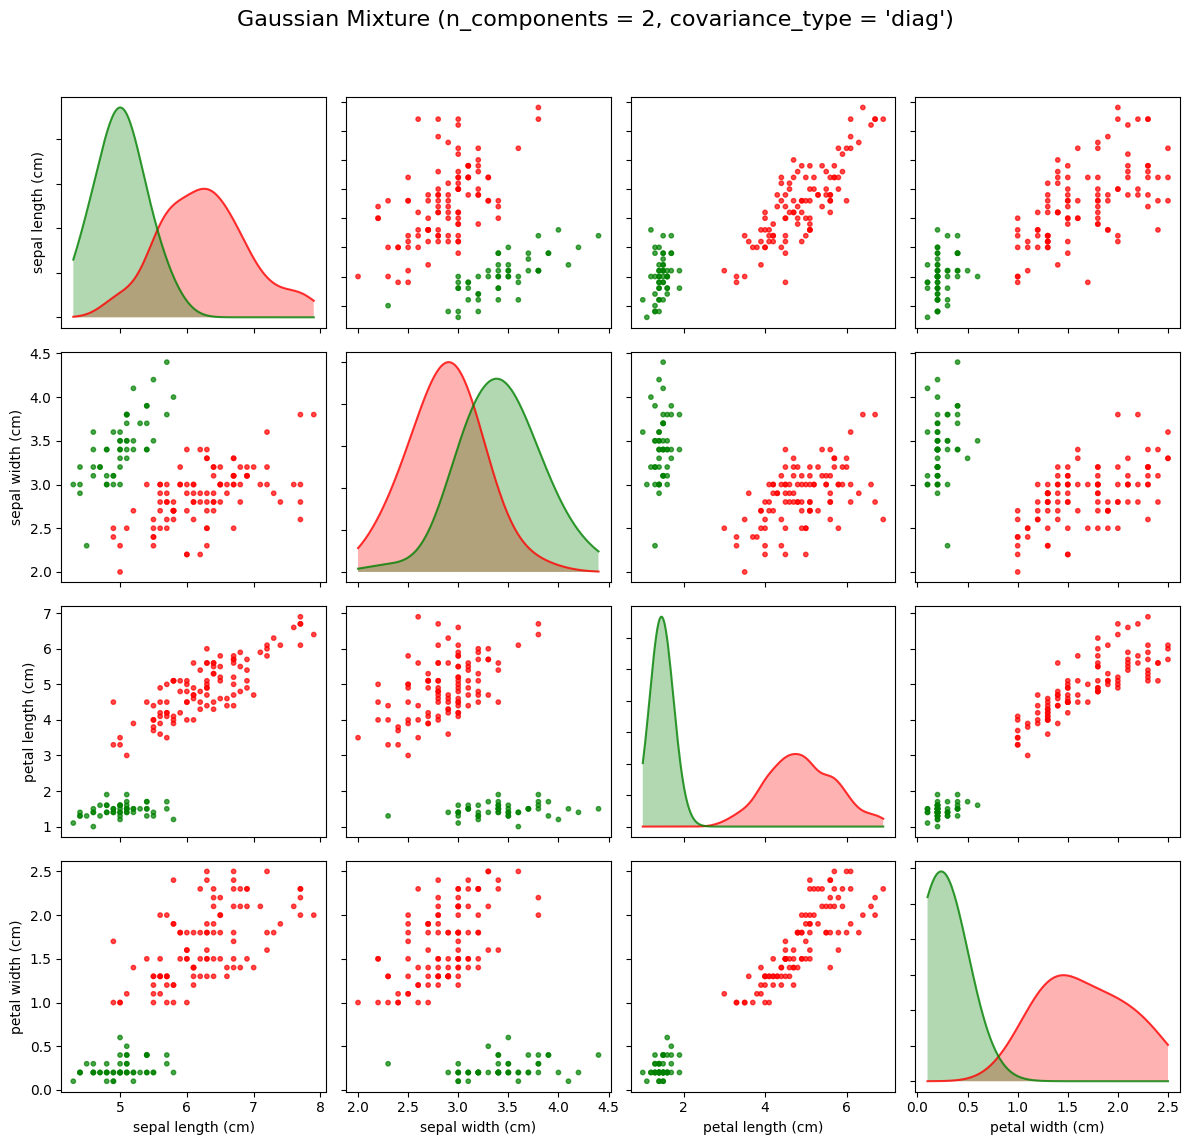

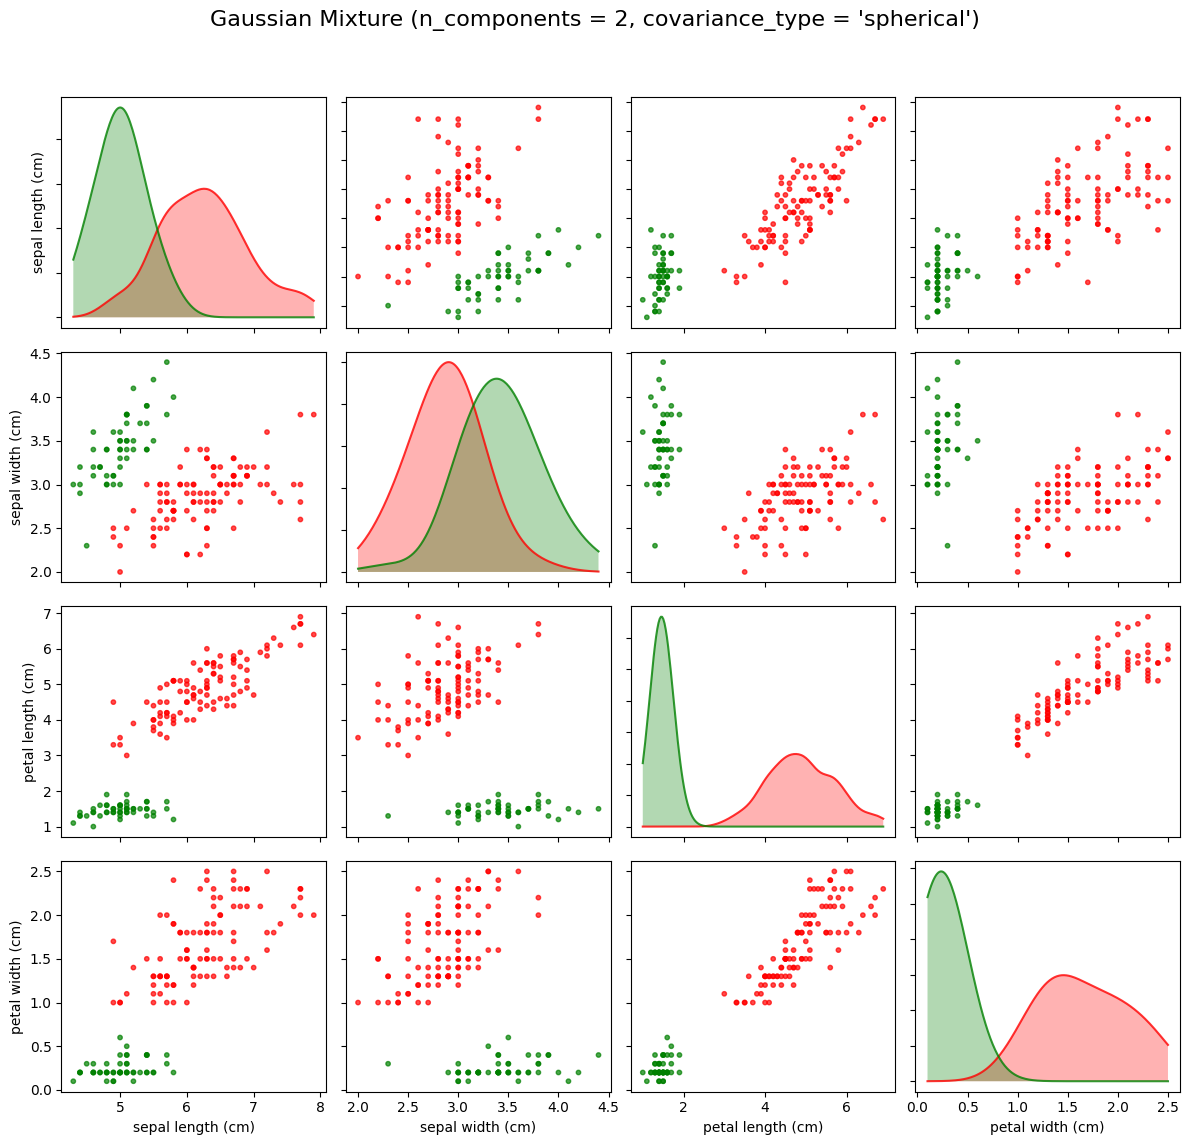

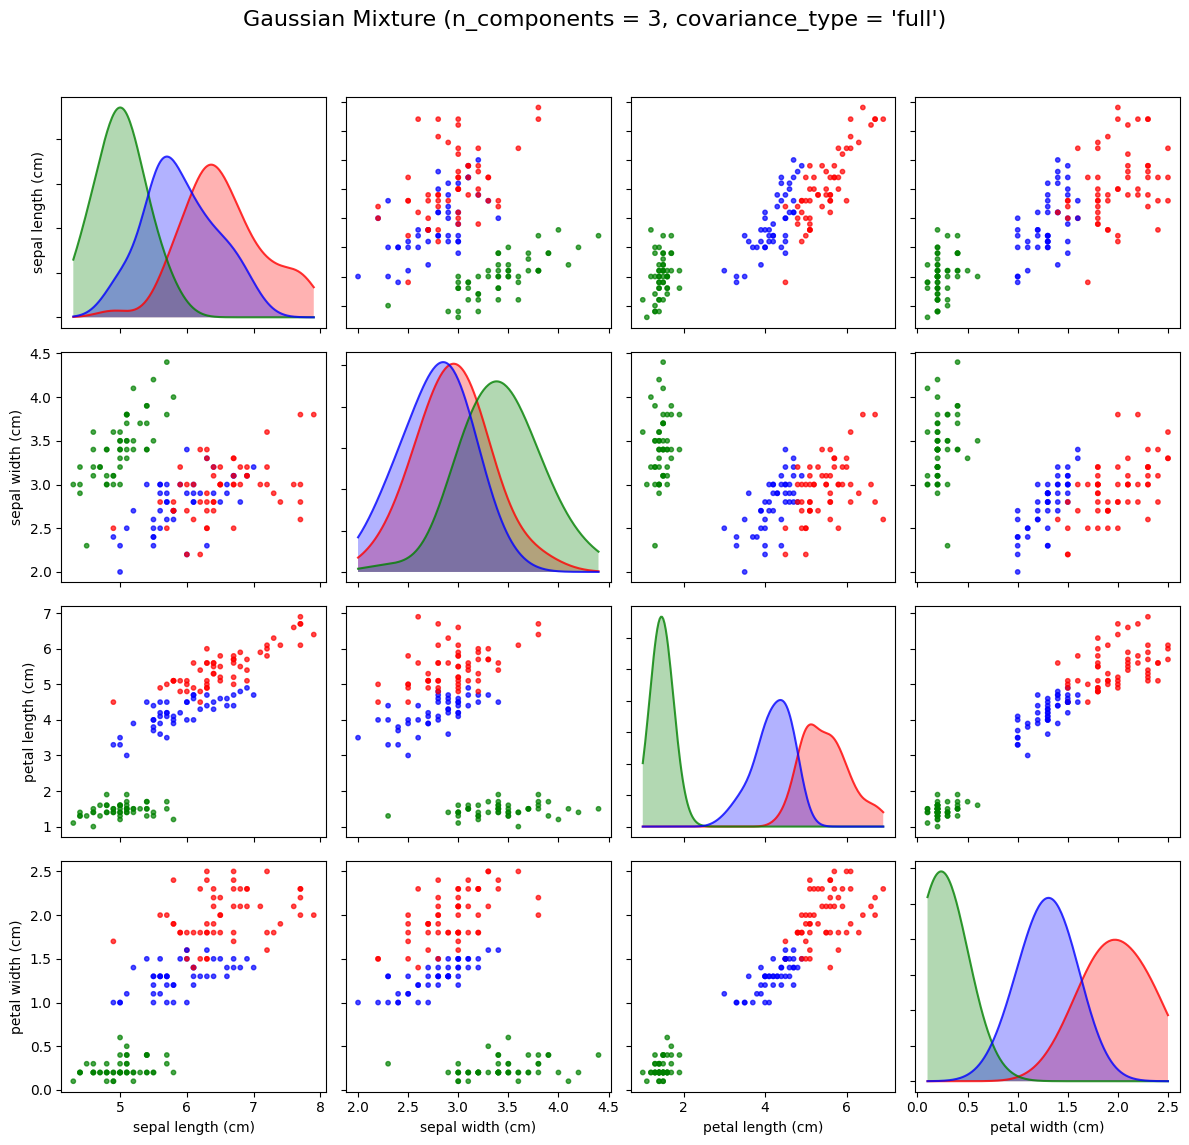

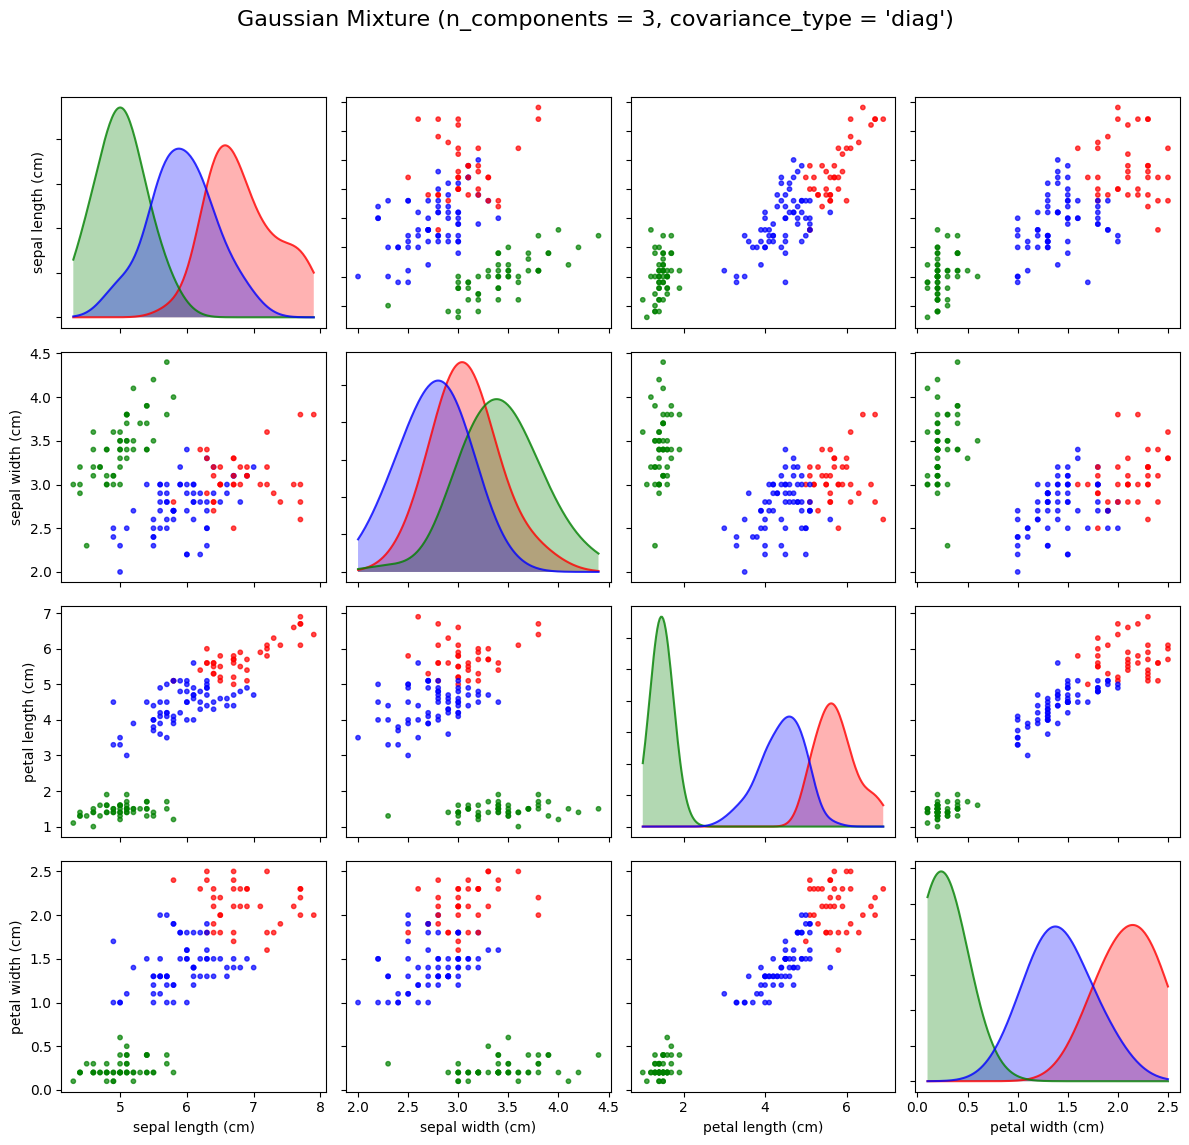

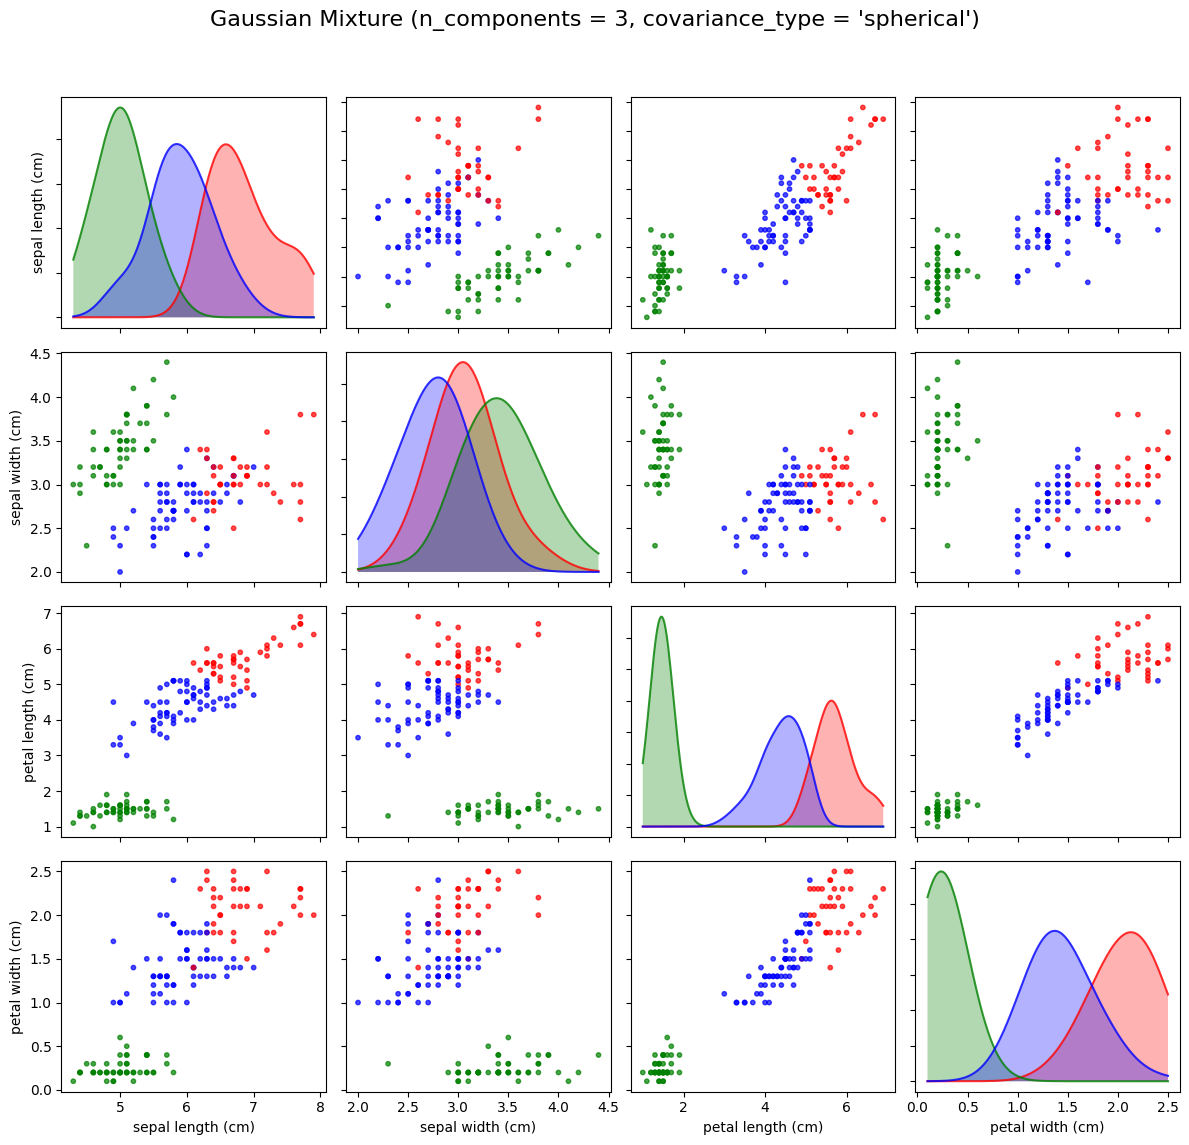

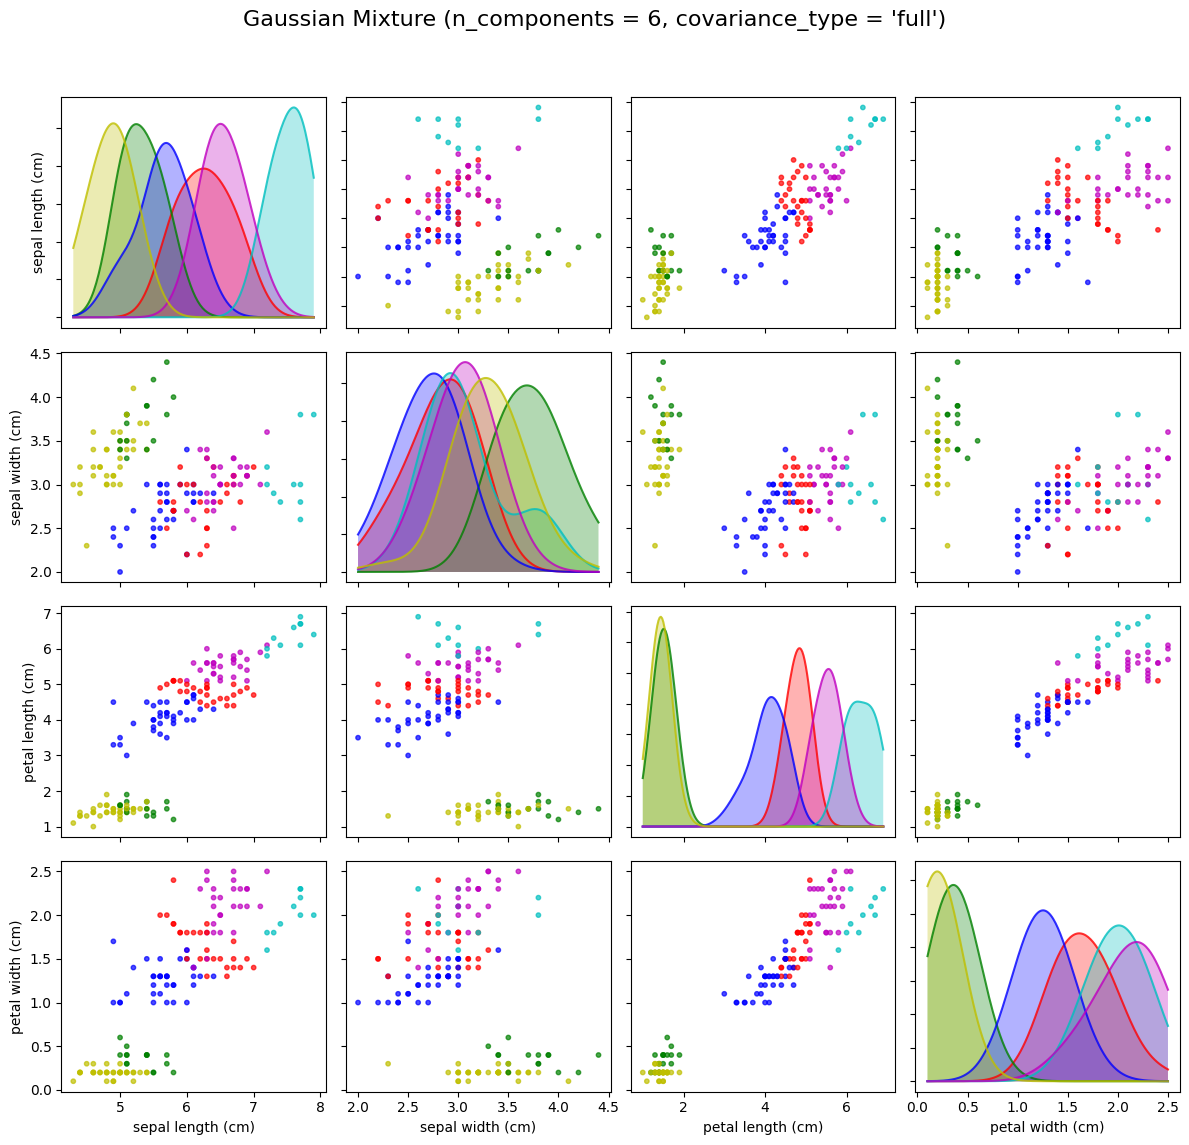

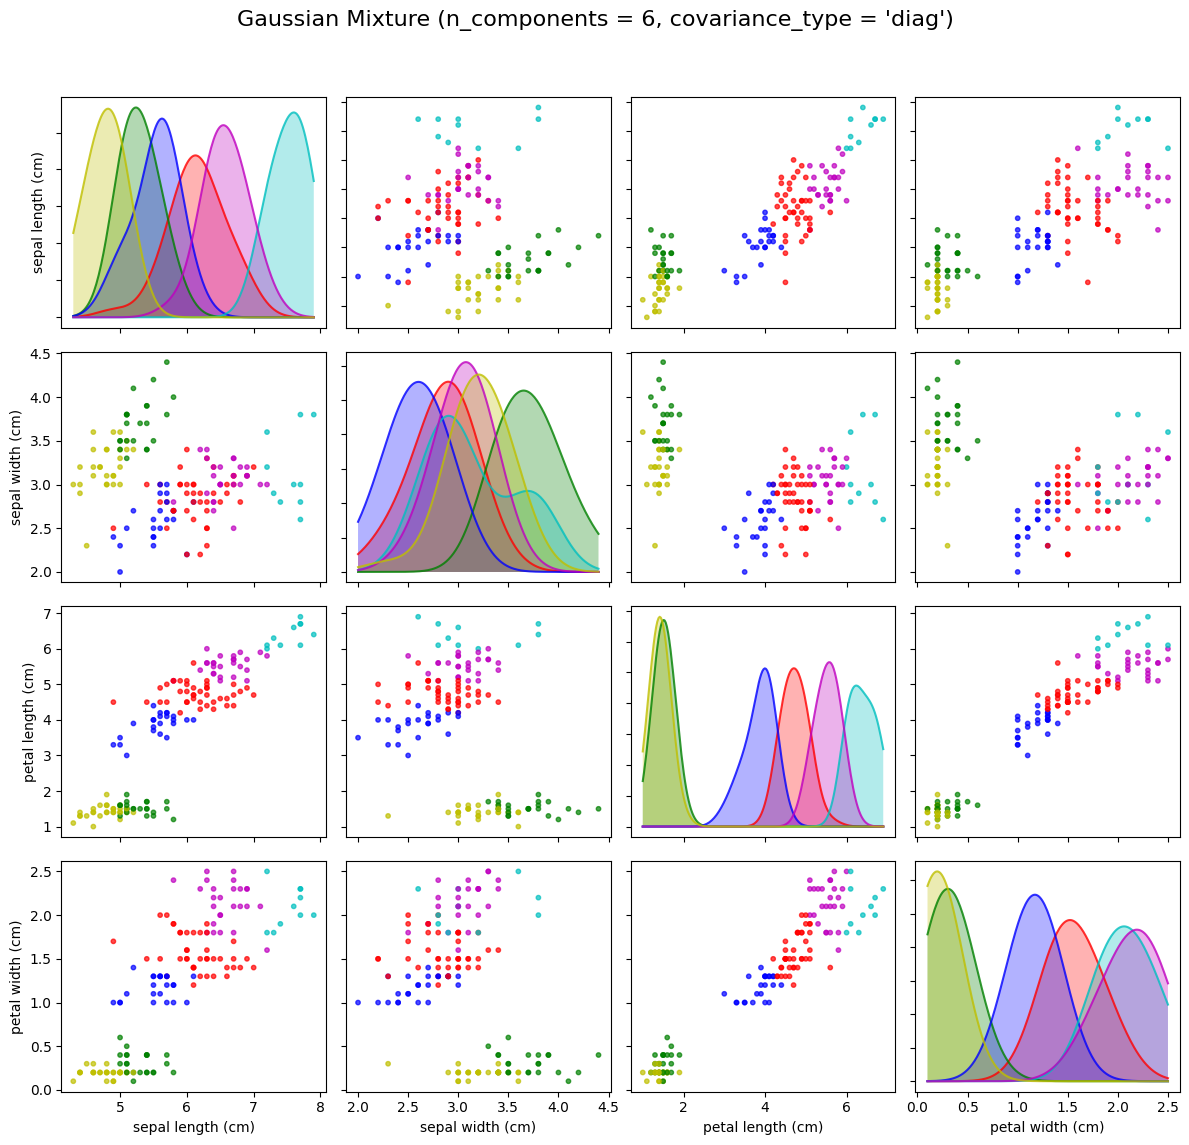

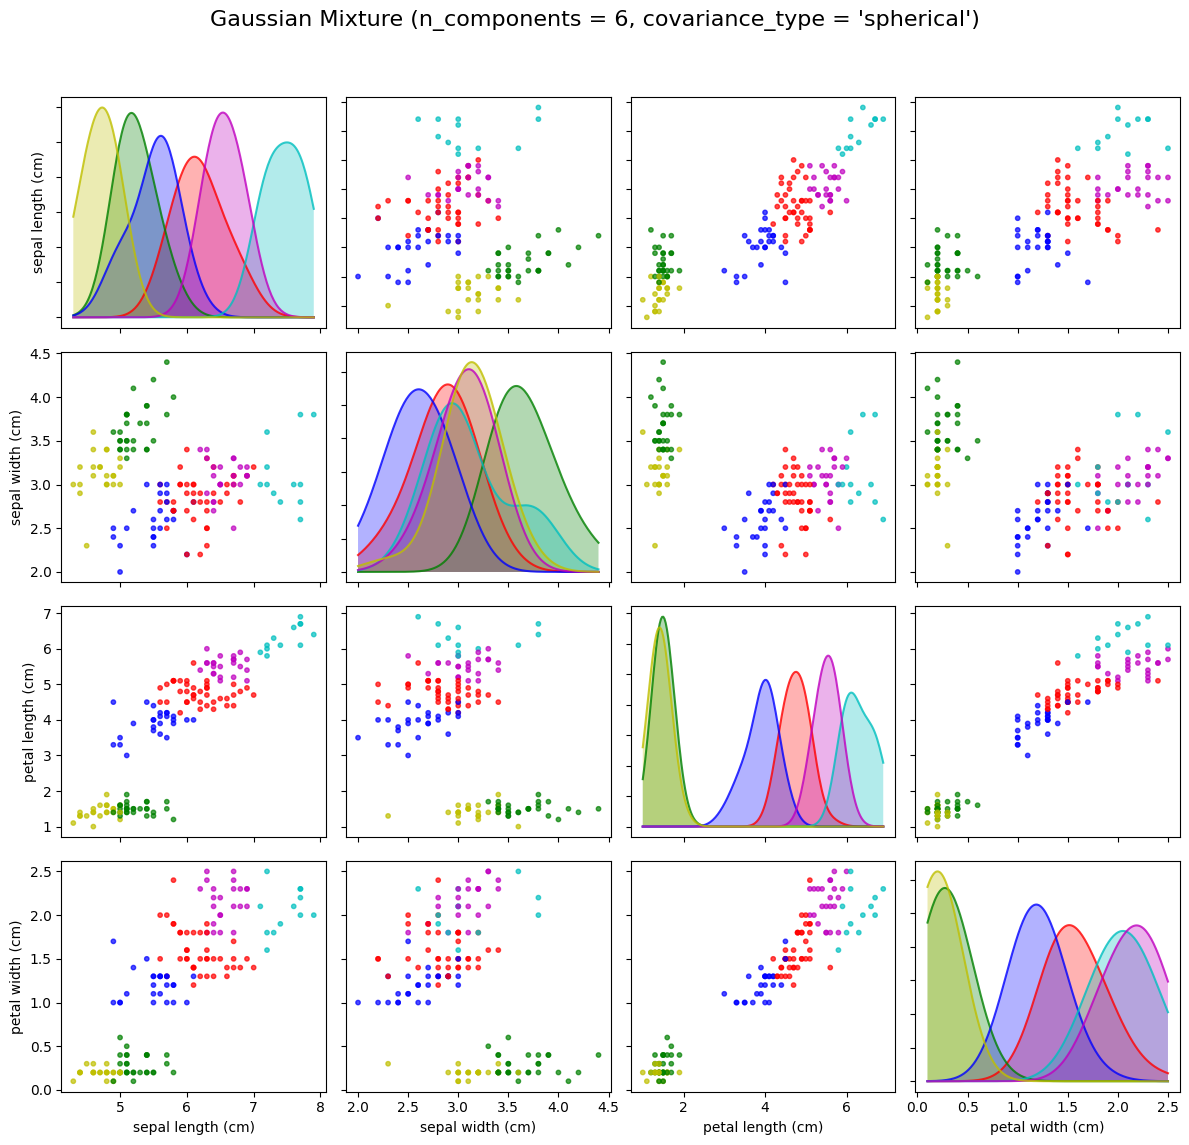

In [6]:
from sklearn.mixture import GaussianMixture

n_components_list = [2, 3, 6]
covariance_types = ['full', 'diag', 'spherical']

for n in n_components_list:
    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        y_gmm = gmm.fit_predict(X)

        title = f"Gaussian Mixture (n_components = {n}, covariance_type = '{cov_type}')"
        plot_pair_matrix(X, y_gmm, title)

### DBSCAN

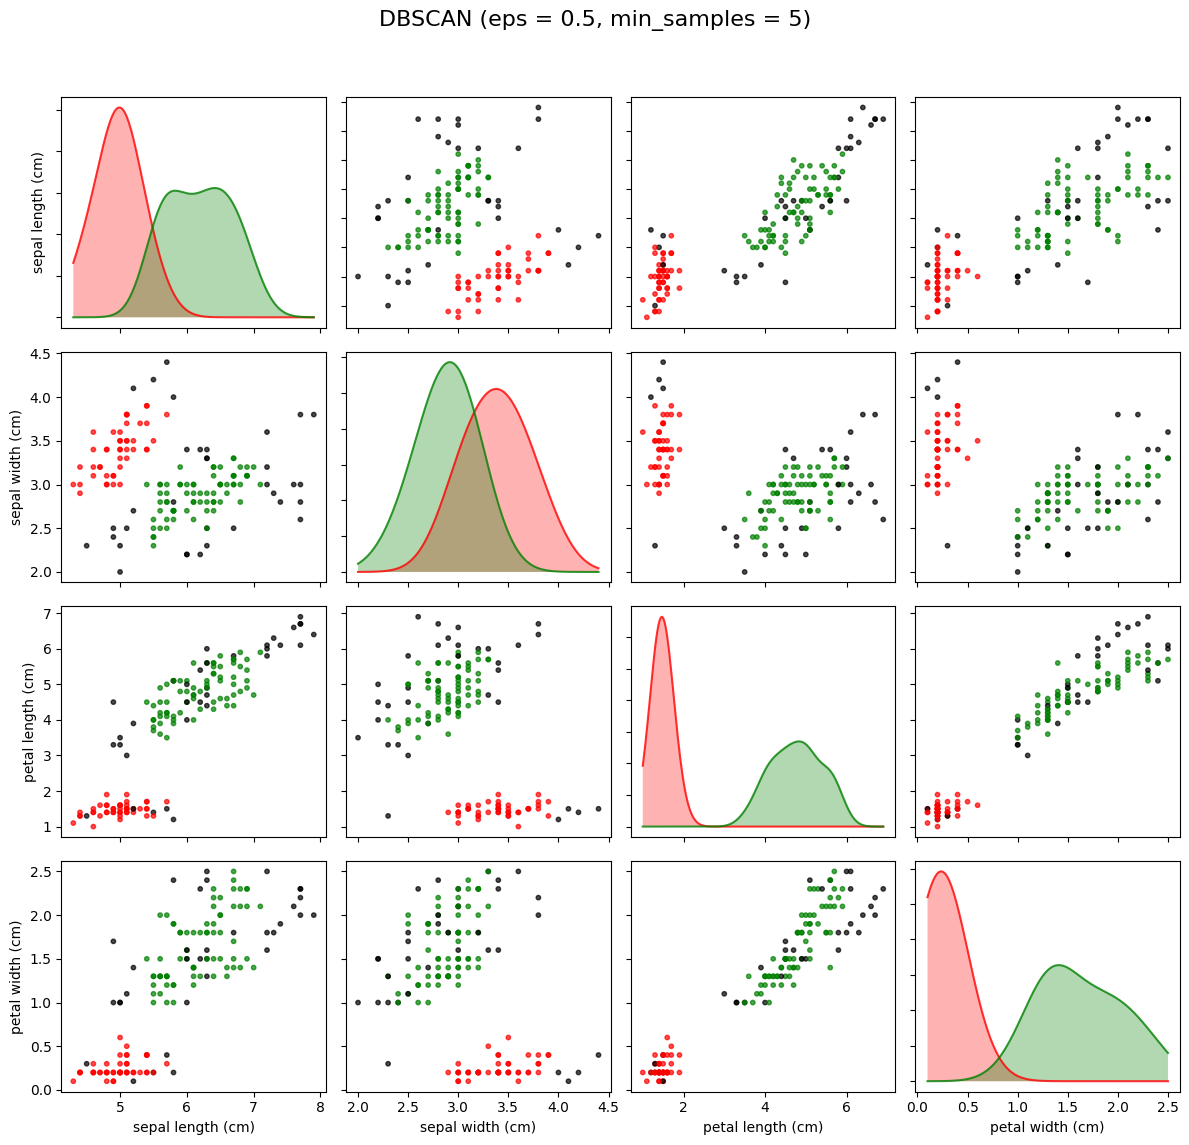

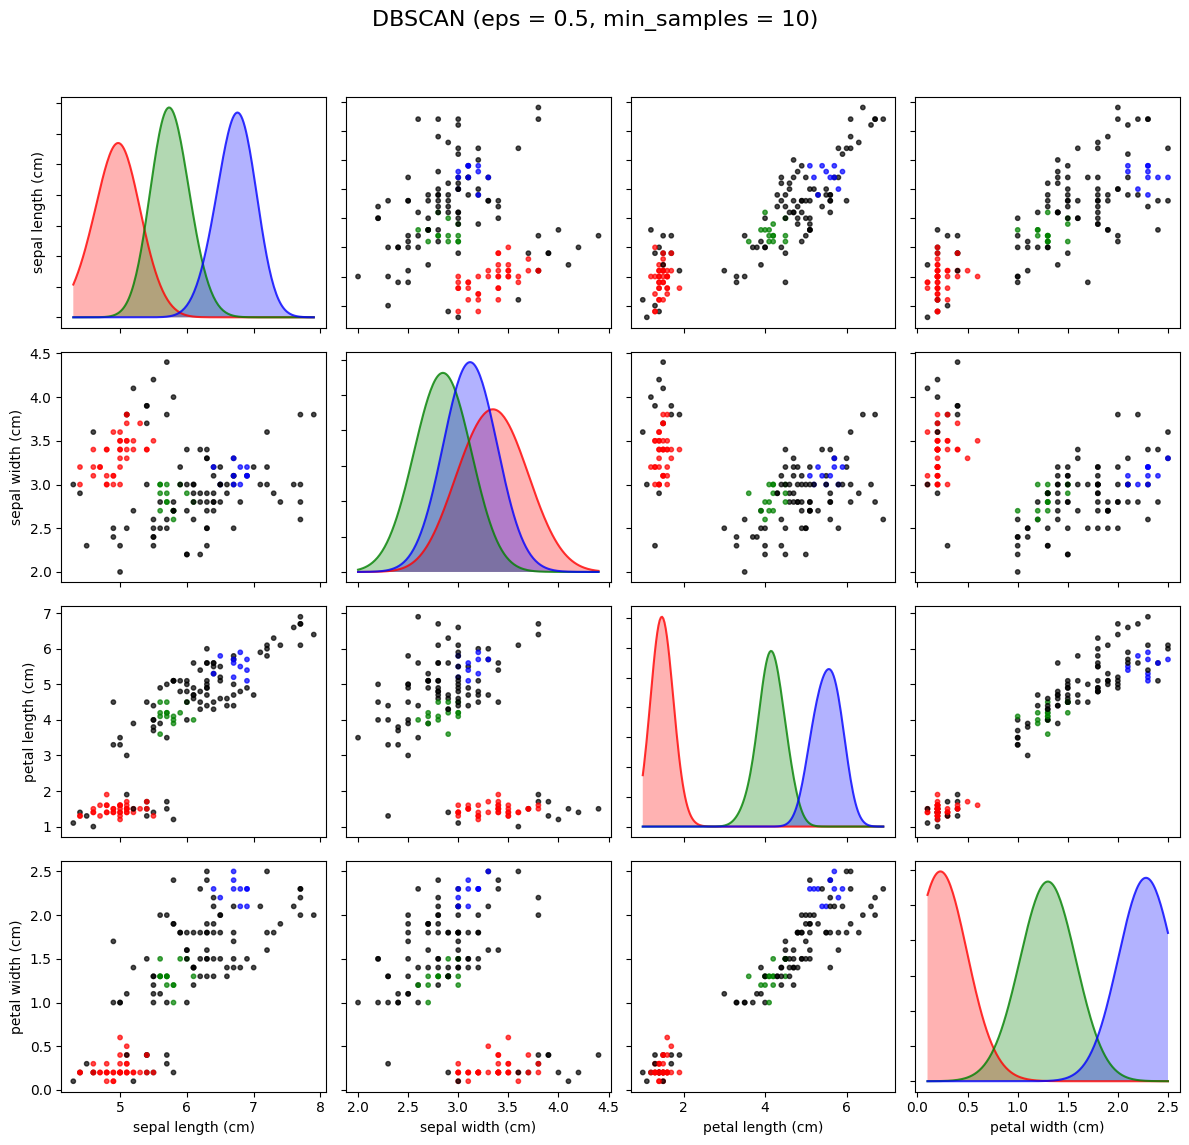

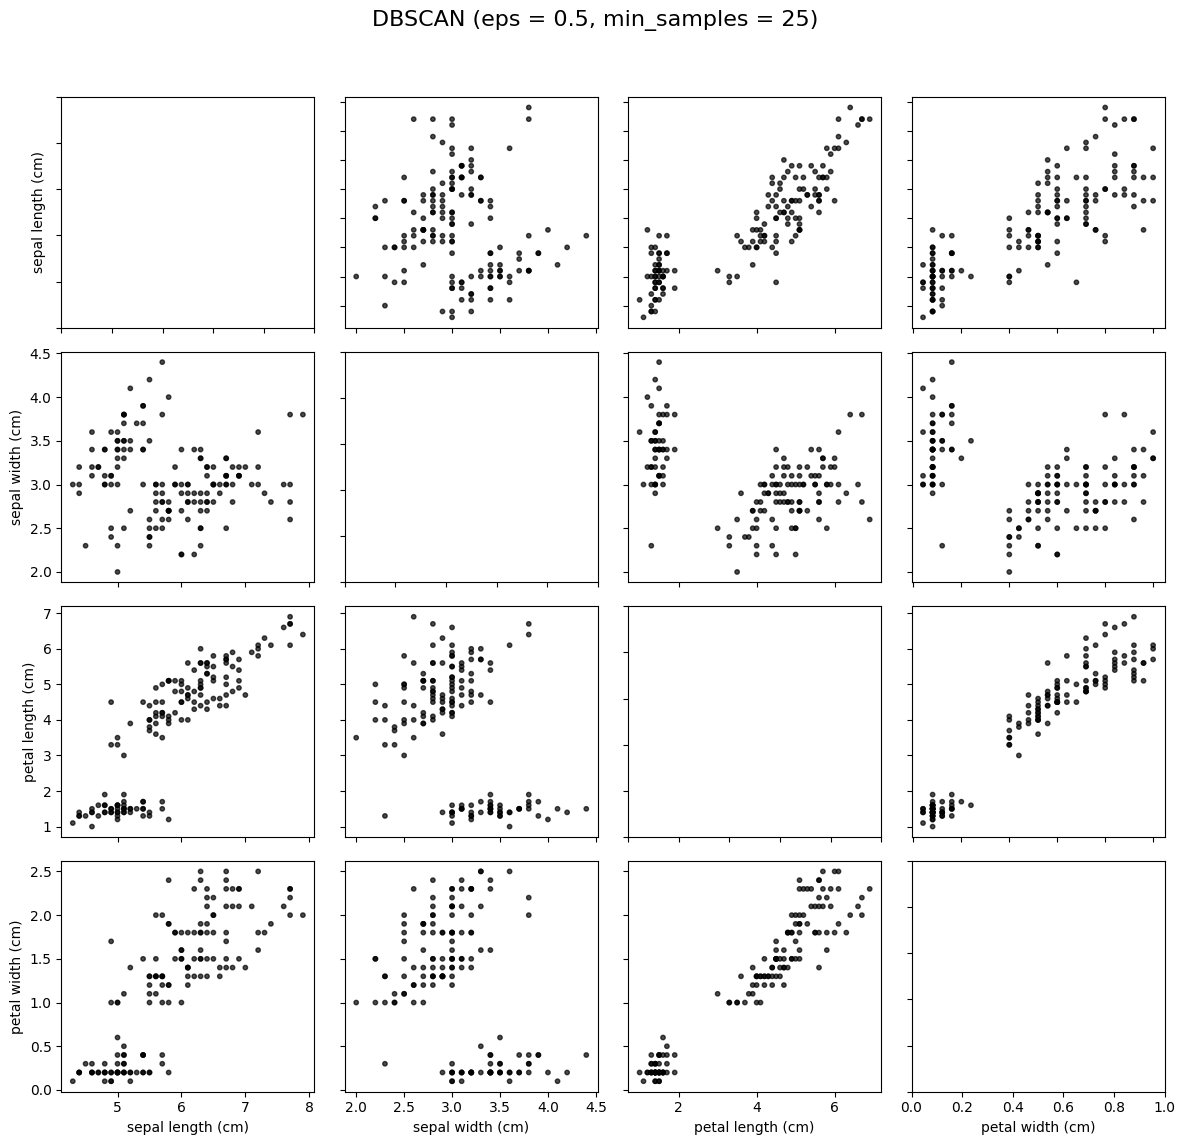

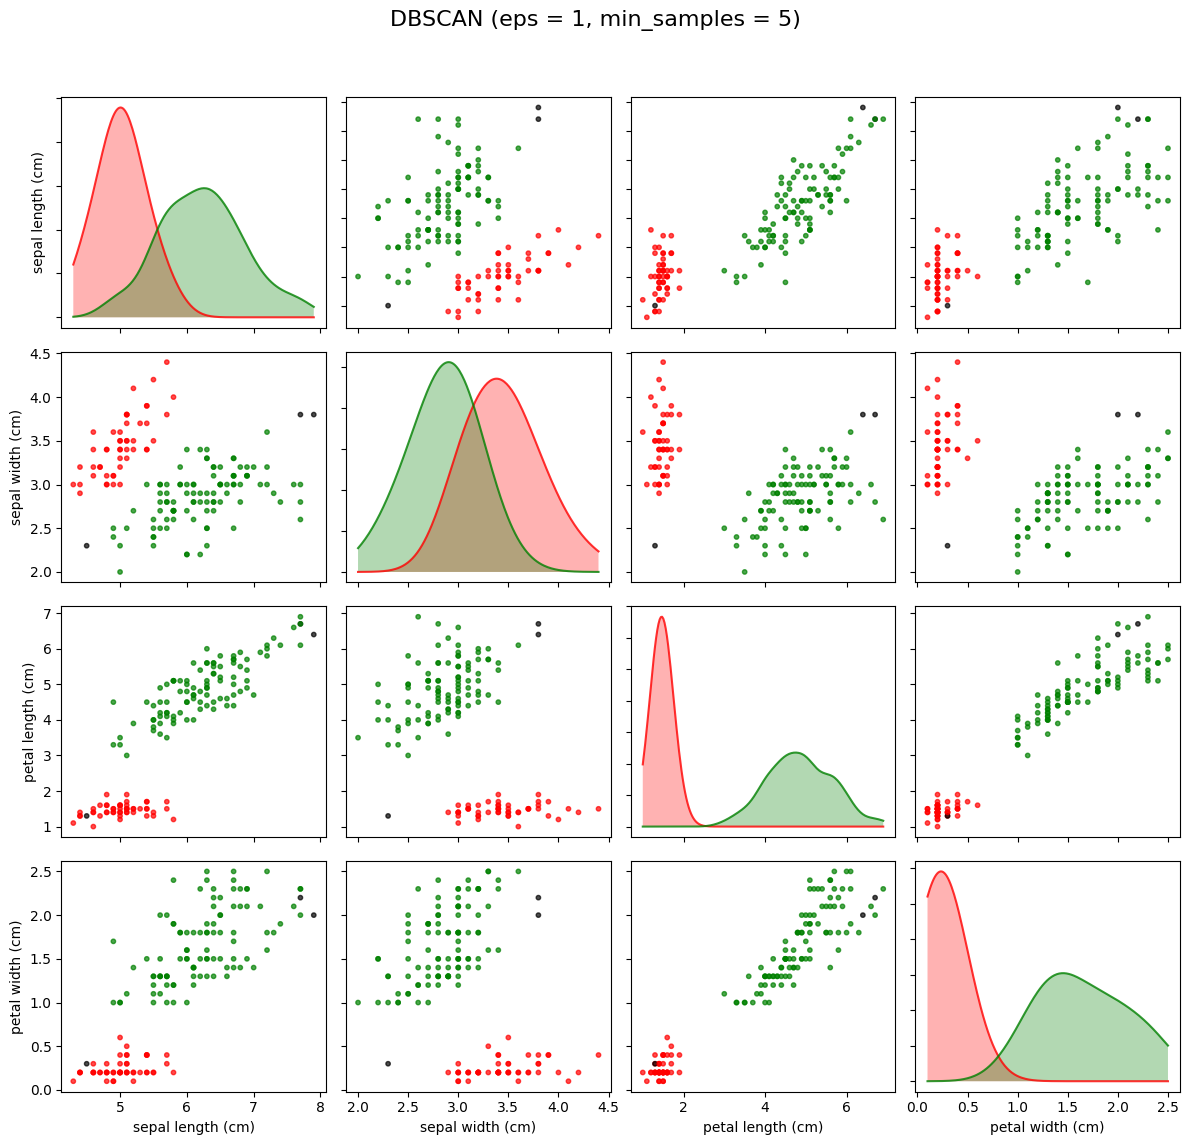

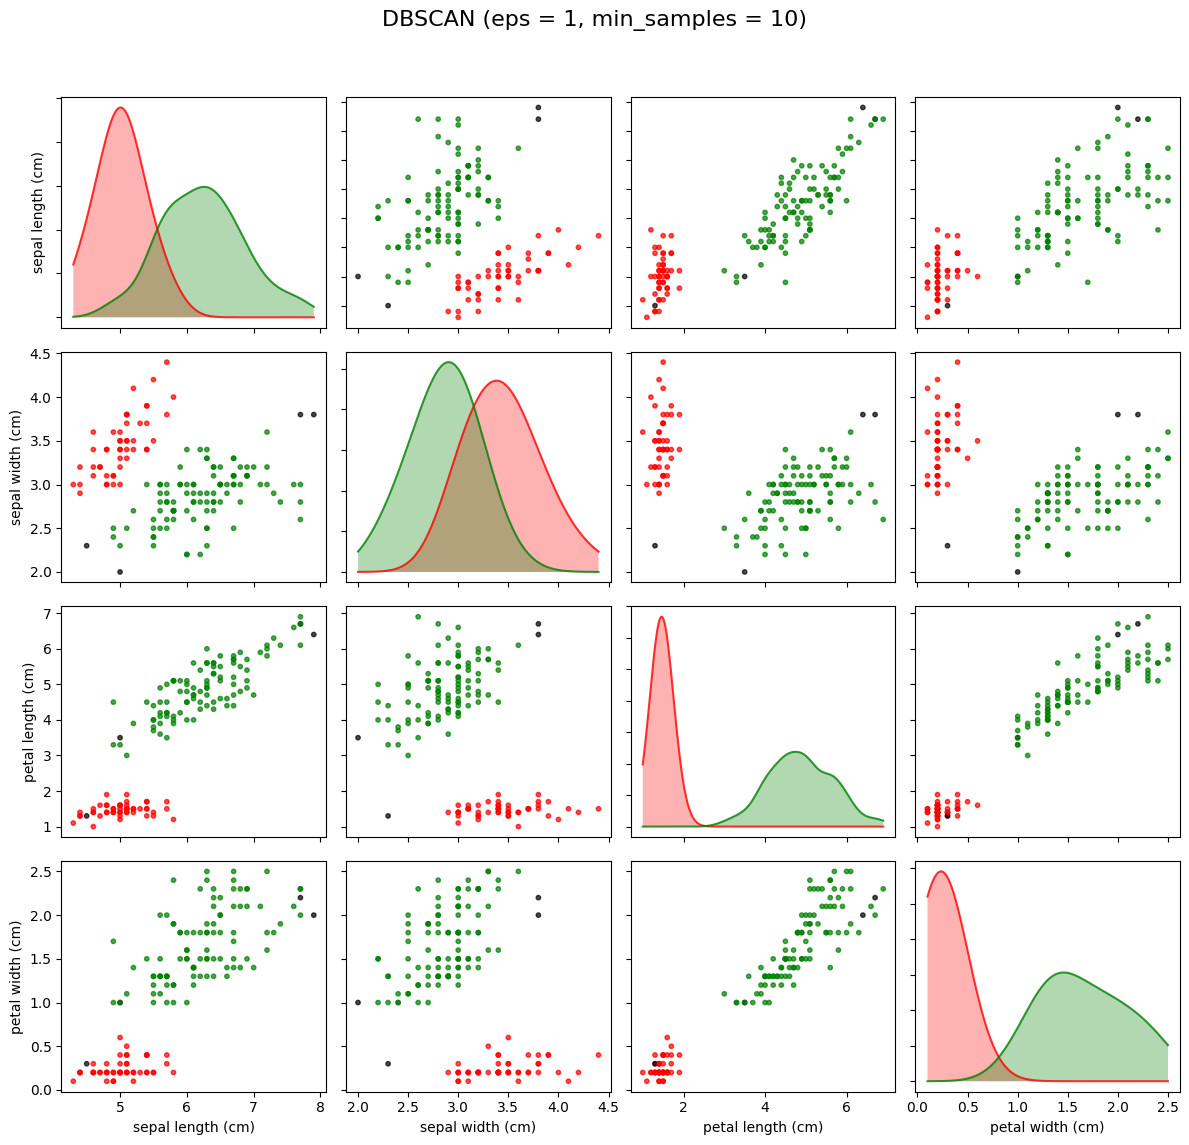

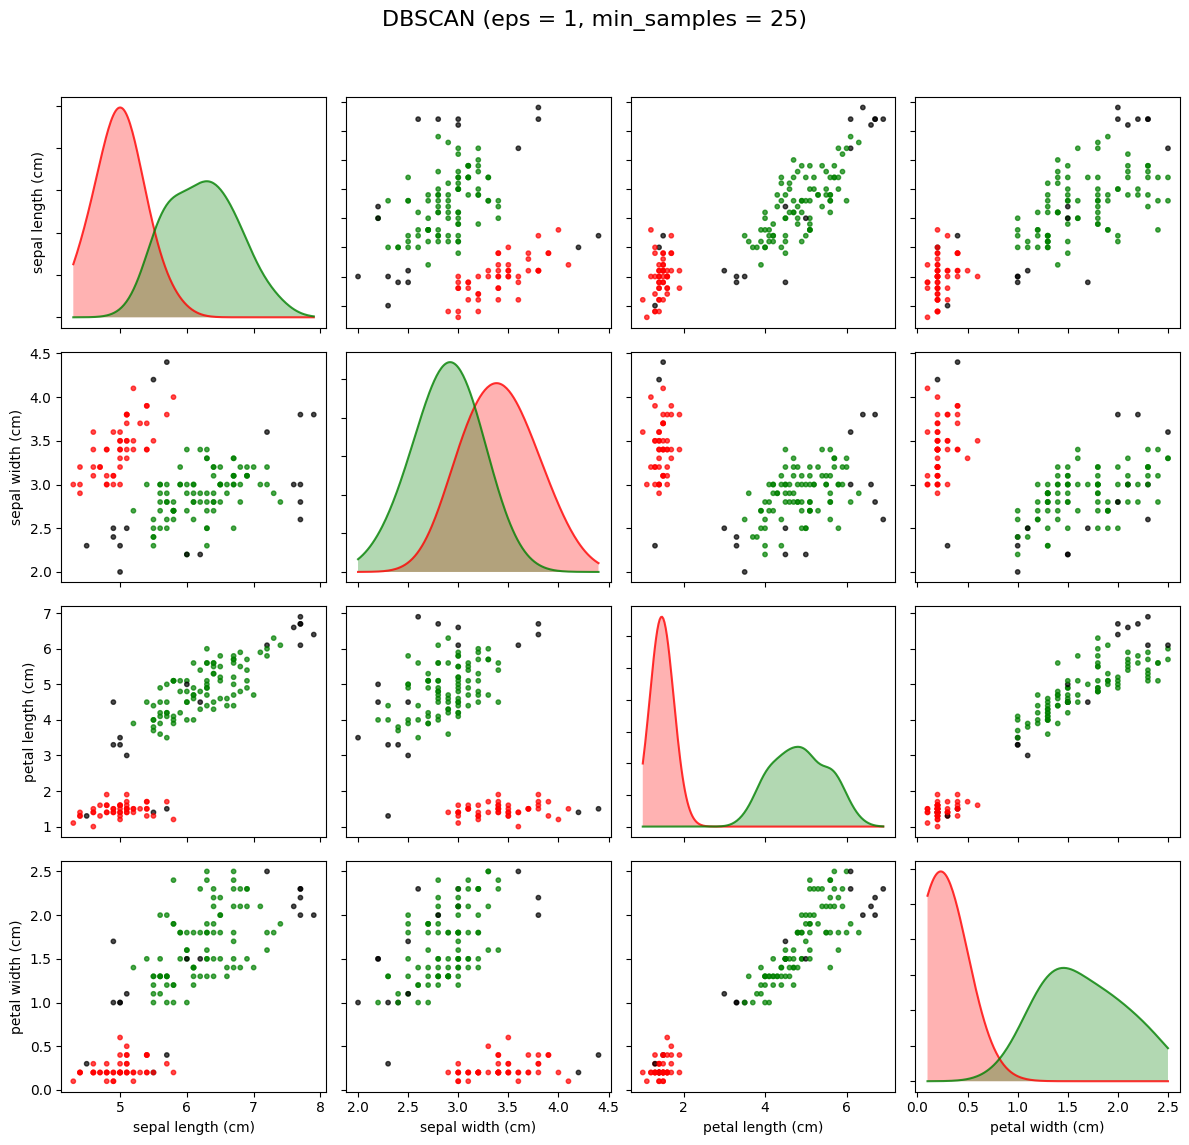

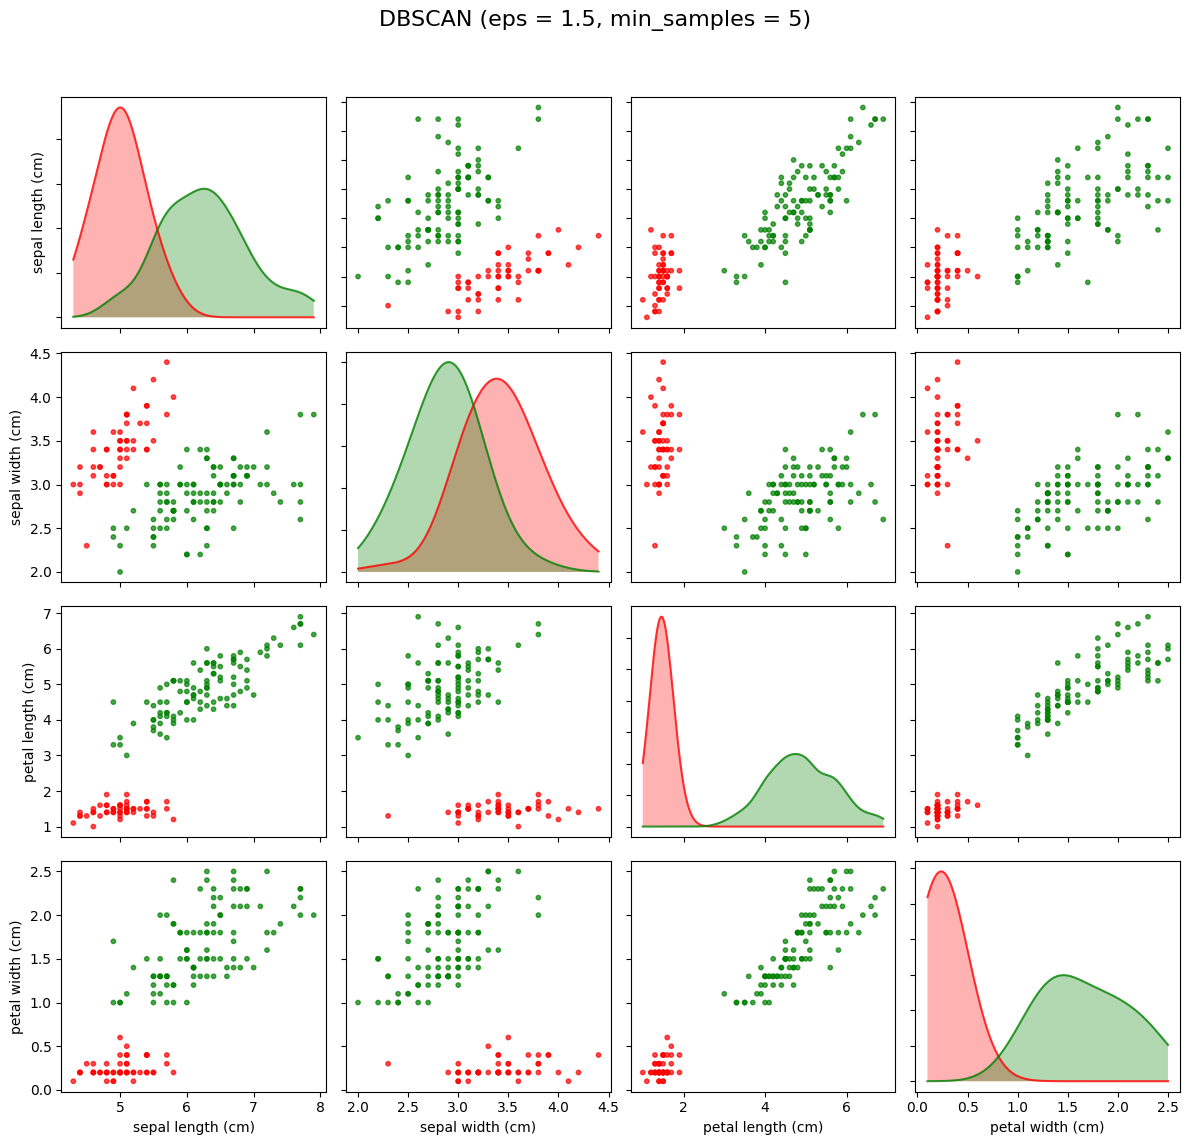

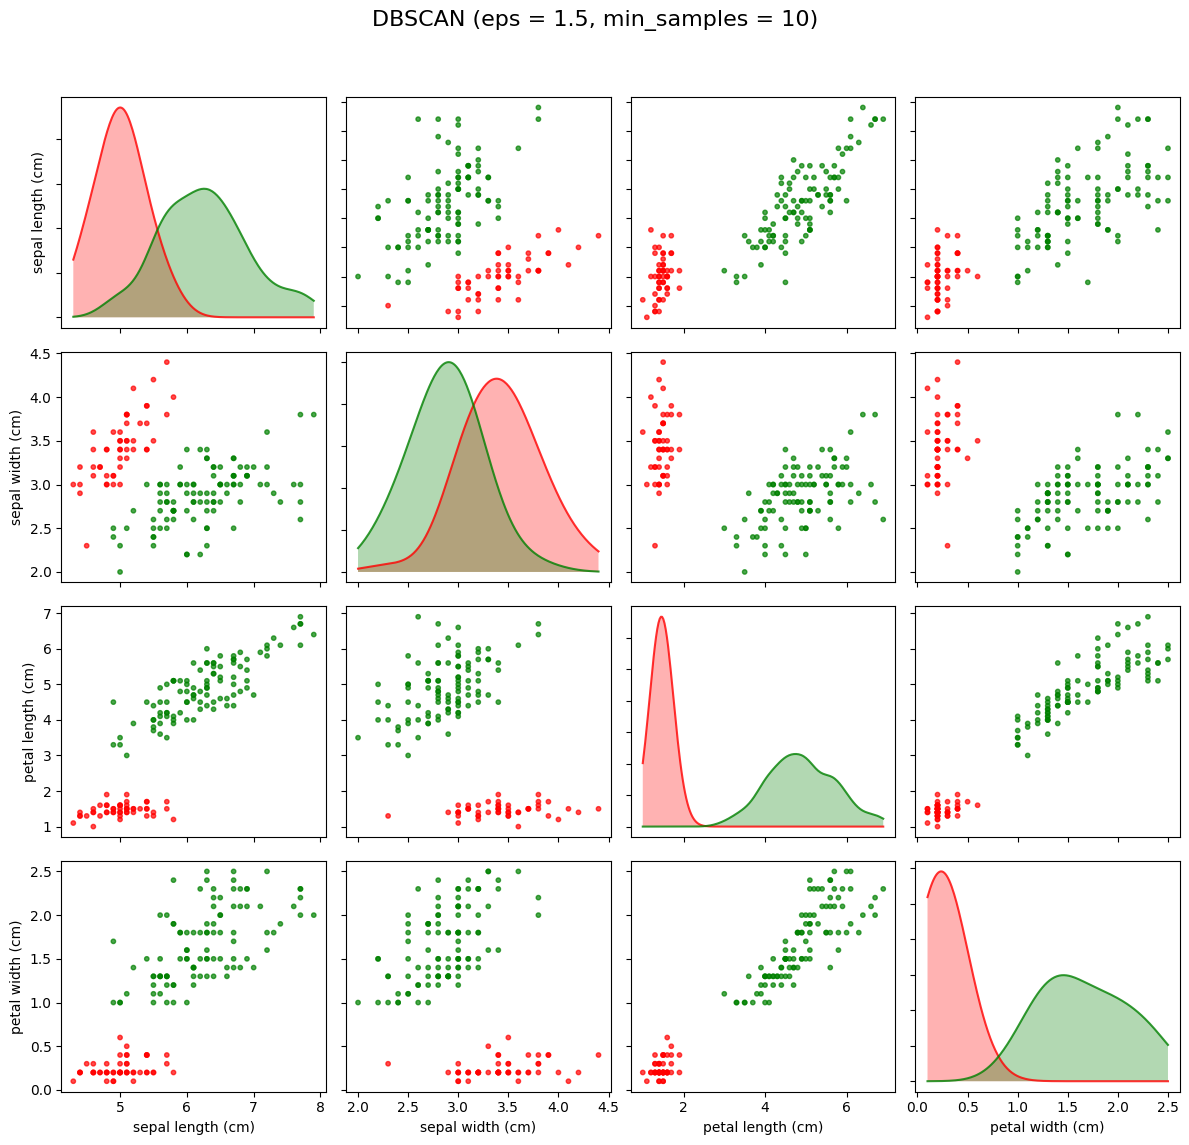

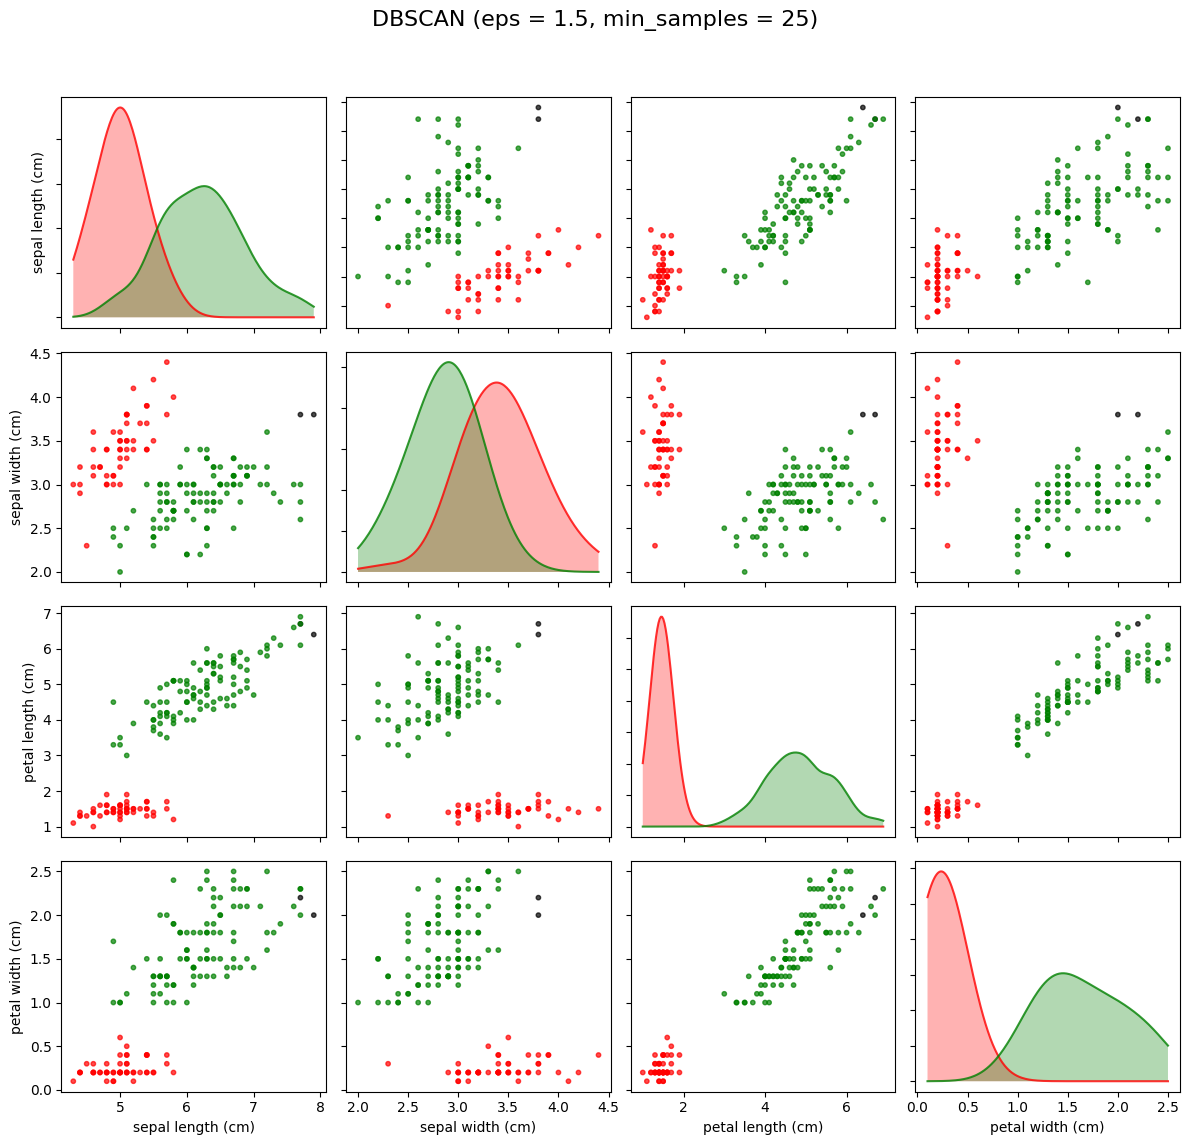

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps_values = [0.5, 1, 1.5]
min_samples_values = [5, 10, 25]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(X_scaled)

        title = f"DBSCAN (eps = {eps}, min_samples = {min_samples})"
        plot_pair_matrix(X, y_dbscan, title)

### Análise dos resultados

Ground Truth (Rótulos Originais): O gráfico original mostra 3 classes. A classe 0 (vermelha, Iris setosa) está claramente separada das outras, principalmente pelas features de pétala (petal length e petal width). As classes 1 e 2 (verde e azul, versicolor e virginica) são mais difíceis de separar, pois se sobrepõem em quase todas as features, embora a petal length ainda seja um bom separador.

K-Means:

k=2: O algoritmo agrupa corretamente a setosa (vermelha) como um cluster, mas força as outras duas classes (versicolor e virginica) a se unirem em um único cluster (verde).

k=3: Este resultado é visualmente muito próximo do Ground Truth. O K-Means, sendo baseado em centróides, funciona muito bem aqui porque os clusters do Iris são "globulares" (esféricos) e bem definidos. Ele consegue separar as três classes com alta precisão.

k=6: O algoritmo divide os clusters originais em sub-clusters. Vemos que a setosa (vermelha no k=3) permanece como um cluster, mas as outras duas são divididas em múltiplos grupos menores. Isso é um caso de "over-clustering" (excesso de clusters).

Gaussian Mixture (GMM):

n=2: Similar ao K-Means com k=2, ele falha em separar as duas classes sobrepostas.

n=3: Os resultados com 3 componentes são excelentes, muito parecidos com o K-Means (k=3) e o Ground Truth. O GMM é mais flexível que o K-Means. O covariance_type='full' (que permite clusters em forma de elipse) e 'diag' parecem ter um desempenho ligeiramente melhor na separação das classes 1 e 2 do que o 'spherical' (que é funcionalmente similar ao K-Means).

n=6: Assim como o K-Means, sofre de over-clustering.

DBSCAN:

O DBSCAN (baseado em densidade) teve um desempenho muito diferente. Ele é projetado para encontrar clusters de formas arbitrárias e identificar ruído, o que não é a principal característica deste dataset.

eps=0.5 (com min_samples=5 ou 10): Estes foram os melhores parâmetros para o DBSCAN. Ele conseguiu identificar a setosa (vermelha) como um cluster denso e separado, e agrupou as outras duas classes (versicolor e virginica) em um segundo cluster (verde). Ele também identificou corretamente alguns pontos como ruído (pretos), que são os pontos que ficam na fronteira entre os clusters.

eps=1.0 ou 1.5: Esses valores de eps (distância) são muito grandes. O algoritmo considera que quase todos os pontos pertencem ao mesmo "bairro" denso, resultando em apenas um grande cluster (vermelho) e alguns poucos pontos de ruído. Ele falha completamente em separar as classes.

min_samples=25: Este valor é muito alto (exige que um ponto tenha 25 vizinhos para ser "central"). Com eps=0.5, isso resulta em quase todos os pontos sendo classificados como ruído (pretos).

Conclusão: Para o dataset Iris, que possui clusters globulares e bem definidos, os algoritmos baseados em centróide (K-Means) e em distribuição (Gaussian Mixture) com k=3 componentes foram os que produziram os resultados mais precisos e mais semelhantes aos rótulos originais. O DBSCAN não foi adequado para esta tarefa específica de separar as 3 classes, embora tenha sido útil para identificar os dois grupos principais de densidade (setosa vs. o resto).